# 1회차 실습 과제: 통계적 사고와 기술통계

## 문제 항목

| 문제 | 주제 | 사용 데이터 |
|------|------|-----------|
| 문제 1 | 중심 경향 측도 (평균, 중앙값, 최빈값, 절사평균, 가중평균) | EMISSIONS |
| 문제 2 | 산포도 측도 (분산, 표준편차, 범위, IQR, 변동계수, 이상치 탐지) | COMB (L/100 km), ENGINE SIZE |
| 문제 3 | 분포의 형태 (왜도, 첨도) | 수치형 변수 전체 |
| 도전 과제 | 라이브러리 없이 기술통계 직접 구현 | 순수 Python |

---

## 데이터 설명

**파일명**: `차량_연비_데이터(2000-2022).csv`

2000~2022년 차량 연비 데이터

| 컬럼 | 설명 |
|------|------|
| YEAR | 차량 제조 연도 |
| MAKE | 제조사 (예: 현대, BMW) |
| MODEL | 차량 모델명 (예: Sonata, Model S) |
| VEHICLE CLASS | 차량 분류 (예: SUV, 세단). 4WD/4X4: 사륜구동, AWD: 전륜구동, FFV: 유연연료 차량 |
| ENGINE SIZE | 엔진 배기량 (단위: 리터) |
| CYLINDERS | 실린더 개수. 출력과 연비에 영향 |
| TRANSMISSION | 변속기 종류. A: 자동, M: 수동, AS: 자동 선택변속기, AV: 무단변속기. 숫자는 기어 수(3~10단) |
| FUEL | 연료 종류. X: 일반 가솔린, Z: 고급 가솔린, D: 디젤, E: 에탄올(E85), N: 천연가스 |
| CITY (L/100 km) | 도심 연비 (연료 소비량) |
| HWY (L/100 km) | 고속도로 연비 (연료 소비량) |
| COMB (L/100 km) | 복합 연비. 도심(55%) + 고속도로(45%) 종합 |
| COMB (mpg) | 복합 연비 (단위: MPG) |
| EMISSIONS | CO2 배출량 (단위: g/km) |

---

In [4]:
# 필수 라이브러리 Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import platform
import os

warnings.filterwarnings('ignore')

# 운영체제별 한글 폰트 설정
if platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Malgun Gothic'
elif platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'
else:
    plt.rcParams['font.family'] = 'NanumGothic'

plt.rcParams['axes.unicode_minus'] = False
np.random.seed(42)

print("="*60)
print("1회차 실습 과제: 통계적 사고와 기술통계")
print("="*60)


1회차 실습 과제: 통계적 사고와 기술통계


In [5]:
# 데이터 로드
DATA_PATH = os.path.join('data', '차량_연비_데이터(20022022).csv')
df = pd.read_csv(DATA_PATH)

# 데이터 기본 검증
df.info()
df.head()

<class 'pandas.DataFrame'>
RangeIndex: 22556 entries, 0 to 22555
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YEAR             22556 non-null  int64  
 1   MAKE             22556 non-null  str    
 2   MODEL            22556 non-null  str    
 3   VEHICLE CLASS    22556 non-null  str    
 4   ENGINE SIZE      22556 non-null  float64
 5   CYLINDERS        22556 non-null  int64  
 6   TRANSMISSION     22556 non-null  str    
 7   FUEL             22556 non-null  str    
 8   CITY (L/100 km)  22556 non-null  float64
 9   HWY (L/100 km)   22556 non-null  float64
 10  COMB (L/100 km)  22556 non-null  float64
 11  COMB (mpg)       22556 non-null  int64  
 12  EMISSIONS        22556 non-null  int64  
dtypes: float64(4), int64(4), str(5)
memory usage: 2.2 MB


,YEAR,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,CITY (L/100 km),HWY (L/100 km),COMB (L/100 km),COMB (mpg),EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [6]:
# 데이터 전처리
df['VEHICLE CLASS'] = (df['VEHICLE CLASS']
                       .str.upper()
                       .str.replace(':', ' -')
                       .str.replace('  ', ' ')
                       .str.strip())

# 범주 값별 빈도 확인
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

---

## 📝 실습 문제 1: 중심 경향 측도

### 배경
차량의 **EMISSIONS(CO2 배출량)** 데이터로 다양한 대표값을 계산하고 비교합니다.

### 이론 복습

| 대표값 | 특징 | 이상치 민감도 |
|--------|------|:-------------:|
| 산술평균 | 모든 값 반영 | 매우 민감 |
| 중앙값 | 정렬 후 가운데 값 | 강건함 |
| 최빈값 | 가장 빈번한 값 | - |
| 절사평균 | 양끝 제거 후 평균 | 중간 |
| 가중평균 | 가중치 반영 평균 | 매우 민감 |

### 수행할 작업
1. EMISSIONS의 산술평균, 중앙값, 최빈값 계산
2. 10%, 20% 절사평균 계산 및 산술평균과 비교
3. 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
4. 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
5. 결과 해석: 어떤 상황에서 어떤 대표값이 적절한지 정리

In [20]:
df['VEHICLE CLASS'].value_counts()

VEHICLE CLASS
COMPACT                     3127
MID-SIZE                    2960
SUV                         2640
PICKUP TRUCK - STANDARD     2204
SUBCOMPACT                  2010
SUV - SMALL                 1756
FULL-SIZE                   1503
TWO-SEATER                  1312
SUV - STANDARD              1122
MINICOMPACT                  994
STATION WAGON - SMALL        877
PICKUP TRUCK - SMALL         511
MINIVAN                      408
STATION WAGON - MID-SIZE     387
VAN - CARGO                  332
VAN - PASSENGER              299
SPECIAL PURPOSE VEHICLE      114
Name: count, dtype: int64

In [42]:
# TODO 1: 기본 대표값 계산 (산술평균, 중앙값, 최빈값)
print(f"산술평균: {df['EMISSIONS'].mean():.2f}")
print(f"중앙값: {df['EMISSIONS'].median():.2f}")
print(f"최빈값: {df['EMISSIONS'].mode().values}")

# TODO 2: 절사평균 계산
print(f"절사평균 (10%): {stats.trim_mean(df['EMISSIONS'], 0.1):.2f}")
print(f"절사평균 (20%): {stats.trim_mean(df['EMISSIONS'], 0.2):.2f}")

# TODO 3: 차량등급(COMPACT, MID-SIZE, SUV)인 차량에 대한 가중평균 계산 (COMPACT 50%, MID-SIZE 30%, SUV 20%)
# 차량 등급 필터링
target_calsses = ['COMPACT', 'MID-SIZE', 'SUV']
target_df = df[df['VEHICLE CLASS'].isin(target_calsses)]

# 그룹바이를 통해 등급별 평균 구하기
class_mean = target_df.groupby('VEHICLE CLASS')['EMISSIONS'].mean()
display(class_mean.round(2))

# 가중치 설정 (COMPACT 50, MID-SIZE 30, SUV 20)
# 판다스의 groupby 결과는 기본적으로 알파벳순으로 정렬
weights = np.array([50,30,20])

# 가중평균 계산
weighted_mean = np.average(class_mean, weights = weights)
print(f'가중평균:{weighted_mean:.2f}')

# TODO 4: 차량등급(COMPACT, MID-SIZE, SUV)별 평균/중앙값 비교
print(f"차량등급(COMPACT, MID-SIZE, SUV)별 평균 {target_df['EMISSIONS'].mean():.2f}")
print(f"차량등급(COMPACT, MID-SIZE, SUV)별 중앙값 {target_df['EMISSIONS'].median():.2f}")

# TODO 5: 결과 해석 (print문으로 작성)
print("----------어떤 상황에서 어떤 대표값이 적절한지 정리-------------")
print("산술평균이 가장 높은 것을 보았을 때  CO2 배출량이 매우 높은 극단치 차량들이 전체 평균을 높이고 있음을 의미한다")
print("일반적인 평균을 보기 위해서는 절사평균을 보는 것이 더 객관적일 수 있다")
print("중앙값과도 봤을 때 절사평균을 한 것이 중앙값에 더 가까운 것을 볼 수 있다")

print("가중평균은 각 클래스 별로 가중치를 둘 수 있기에 특정 집단의 중요도를 반영하고 싶을 때 사용한다")
print("실제로 클래스 별 평균이 가장 낮은 COMPACT에 가중치를 많이 뒀기에 등급별 평균보다 낮게 나온 것을 확인할 수 있다")


print("최빈 값은 실제 가장 흔한 차량의 배출량을 보여준다")
print("데이터가 비대칭일 경우, 중앙값이 산술평균보다 데이터의 중간 위치를 더 잘 나타낸다")



산술평균: 250.07
중앙값: 243.00
최빈값: [221]
절사평균 (10%): 247.34
절사평균 (20%): 245.40


VEHICLE CLASS
COMPACT     211.54
MID-SIZE    223.70
SUV         270.30
Name: EMISSIONS, dtype: float64

가중평균:226.94
차량등급(COMPACT, MID-SIZE, SUV)별 평균 233.44
차량등급(COMPACT, MID-SIZE, SUV)별 중앙값 225.00
----------어떤 상황에서 어떤 대표값이 적절한지 정리-------------
산술평균이 가장 높은 것을 보았을 때  CO2 배출량이 매우 높은 극단치 차량들이 전체 평균을 높이고 있음을 의미한다
일반적인 평균을 보기 위해서는 절사평균을 보는 것이 더 객관적일 수 있다
중앙값과도 봤을 때 절사평균을 한 것이 중앙값에 더 가까운 것을 볼 수 있다
가중평균은 각 클래스 별로 가중치를 둘 수 있기에 특정 집단의 중요도를 반영하고 싶을 때 사용한다
실제로 클래스 별 평균이 가장 낮은 COMPACT에 가중치를 많이 뒀기에 등급별 평균보다 낮게 나온 것을 확인할 수 있다
최빈 값은 실제 가장 흔한 차량의 배출량을 보여준다
데이터가 비대칭일 경우, 중앙값이 산술평균보다 데이터의 중간 위치를 더 잘 나타낸다


---

## 📝 실습 문제 2: 산포도 측도

### 배경
**COMB (L/100 km)** 와 **ENGINE SIZE**의 산포를 분석합니다.

### 이론 복습

| 지표 | 계산 방식 | 이상치 민감도 |
|------|----------|:------------:|
| 분산/표준편차 | 평균 기준 편차 제곱 | 민감 |
| 범위 | 최대 - 최소 | 매우 민감 |
| IQR | Q3 - Q1 | 강건 |

### 이상치 탐지 방법
- **IQR 방법**: Q1 - 1.5×IQR 미만 또는 Q3 + 1.5×IQR 초과
- **Z-score 방법**: |Z| > 2 또는 3

### 수행할 작업
1. 두 변수의 분산, 표준편차, 범위, IQR 계산
2. 변동계수(CV) 계산하여 상대적 산포 비교
3. IQR 방법과 Z-score 방법으로 이상치 탐지 및 비교
4. 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
5. 차량등급별(COMPACT, MID-SIZE, SUV) 두 변수의 표준편차 비교
6. 결과 해석

[COMB (L/100 km)]
분산: 8.47
표준편차: 2.91
범위: 22.50
IQR: 3.60
--------------------------
[ENGINE SIZE]
분산: 1.78
표준편차: 1.34
범위: 7.60
IQR: 1.90
COMB (L/100 km) cv: 26.38
ENGINE SIZE cv: 39.78
COMB (L/100 km) IQR 이상치 개수: 548
ENGINE SIZE IQR 이상치 개수: 41
[COMB (L/100 km)] |Z-score| > 2 이상치 개수: 1124개
[COMB (L/100 km)] |Z-score| > 3 이상치 개수: 219개
[ENGINE SIZE] |Z-score| > 2 이상치 개수: 762개
[ENGINE SIZE] |Z-score| > 3 이상치 개수: 41개


,COMB (L/100 km),ENGINE SIZE
VEHICLE CLASS,,
COMPACT,2.06,1.08
MID-SIZE,2.40,1.19
SUV,2.71,1.20


CV는 ENGINE SIZE가 더 높으므로 평균 대비 데이터의 상대적인 변동성은 엔진 크기가 더 크다
이는 엔진 크기가 연료 소비량보다 상대적으로 더 다양한 분포를 가지고 있다
Z-score 방식이 IQR 방식보다 훨씬 많은 이상치를 탐지했다
두 컬럼은 전체적으로 평균보다 높은 수치에 꼬리가 길게 늘어진 분포에서는 평균의 영향을 안 받는 IQR 방식이 가장 믿을만 하다
시각화 2번과 4번 박스플랏을 보면 SUV 등급이 COMPACT나 MID_SIZE보다 박스의 크기가 크고 중앙값이 높다
SUV 등급의 표준편차가 가장 높게 나타났다. 이는 SUV 차종이 연비나 엔진 크기 면에서 모델 간 성능 차이가 가장 크며, 분포가 넓게 퍼져 있음을 보여준다
SUV는 데이터가 넓게 퍼져 있고 COMPACY는 박스가 작고 촘촘하다. 조금만 연비가 나빠다 바로 이상치로 판정이 된다


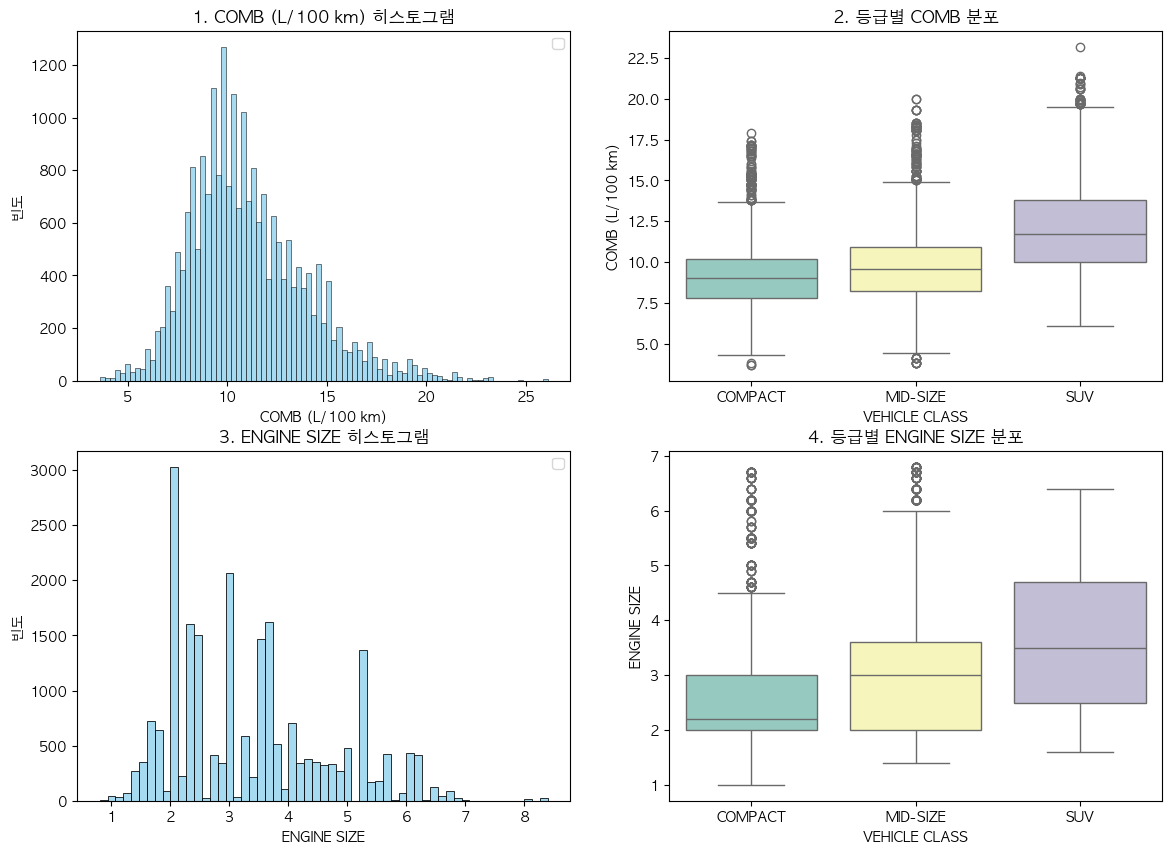

In [96]:
def IQR_set(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR

def column_stats(column_name):
    col_data = df[column_name]
    
    # 분산
    var_val = col_data.var()
    # 표준편차
    std_val = col_data.std()
    # 범위
    data_range = col_data.max() - col_data.min()
    
    # IQR (함수 통해 불러오기 )
    q1, q3, iqr_val = IQR_set(column_name)

    print(f"[{column_name}]")
    print(f"분산: {var_val:.2f}")
    print(f"표준편차: {std_val:.2f}")
    print(f"범위: {data_range:.2f}")
    print(f"IQR: {iqr_val:.2f}")
    

# TODO 1: 두 변수의 산포 측도 계산
column_stats('COMB (L/100 km)')
print("--------------------------")
column_stats('ENGINE SIZE')


# TODO 2: 변동계수(CV) 계산
print("===========================")
def cv(column_name):
    """변동계수(%) 계산"""
    col_data = df[column_name]
    return (col_data.std() / col_data.mean()) * 100

print(f"COMB (L/100 km) cv: {cv('COMB (L/100 km)'):.2f}")
print(f"ENGINE SIZE cv: {cv('ENGINE SIZE'):.2f}")

# TODO 3: 이상치 탐지 (IQR, Z-score)
print("===========================")

# IQR
q1, q3, iqr = IQR_set('COMB (L/100 km)')
lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

comb_outliers = df[(df['COMB (L/100 km)'] < lower_limit) | (df['COMB (L/100 km)'] > upper_limit)]
print(f"COMB (L/100 km) IQR 이상치 개수: {len(comb_outliers)}")


q1, q3, iqr = IQR_set('ENGINE SIZE')

lower_fence = q1 - 1.5 * iqr
upper_fence = q3 + 1.5 * iqr

engine_outliers = df[(df['ENGINE SIZE'] < lower_fence) | (df['ENGINE SIZE'] > upper_fence)]
print(f"ENGINE SIZE IQR 이상치 개수: {len(engine_outliers)}")


#  Z-score
def zscore_outliers(column_name):
    z_scores = np.abs(stats.zscore(df[column_name]))
    
    outliers_2 = df[z_scores > 2]
    outliers_3 = df[z_scores > 3]
    print(f"[{column_name}] |Z-score| > 2 이상치 개수: {len(outliers_2)}개")
    print(f"[{column_name}] |Z-score| > 3 이상치 개수: {len(outliers_3)}개")

zscore_outliers('COMB (L/100 km)')
zscore_outliers('ENGINE SIZE') 

# TODO 4: 2×2 시각화: 각 변수의 히스토그램 + 차량등급별 박스플롯
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

sns.histplot(df['COMB (L/100 km)'],  kde=False, color='skyblue', edgecolor='black', ax=axes[0, 0])
axes[0, 0].set_xlabel('COMB (L/100 km)')
axes[0, 0].set_ylabel('빈도')
axes[0, 0].set_title('1. COMB (L/100 km) 히스토그램', fontweight='bold')
axes[0, 0].legend()

sns.boxplot(x='VEHICLE CLASS', y='COMB (L/100 km)', data=target_df, palette='Set3', ax=axes[0, 1])
axes[0, 1].set_title('2. 등급별 COMB 분포', fontweight='bold')

sns.histplot(df['ENGINE SIZE'],  kde=False, color='skyblue', edgecolor='black', ax=axes[1, 0])
axes[1, 0].set_xlabel('ENGINE SIZE')
axes[1, 0].set_ylabel('빈도')
axes[1, 0].set_title('3. ENGINE SIZE 히스토그램', fontweight='bold')
axes[1, 0].legend()

sns.boxplot(x='VEHICLE CLASS', y='ENGINE SIZE', data=target_df, palette='Set3', ax=axes[1, 1])
axes[1, 1].set_title('4. 등급별 ENGINE SIZE 분포', fontweight='bold')

# TODO 5: 차량등급별(COMPACT, MID-SIZE, SUV) 표준편차 비교
print("===========================")
class_std = target_df.groupby('VEHICLE CLASS')[['COMB (L/100 km)', 'ENGINE SIZE']].std()
display(class_std.round(2))

# TODO 6: 결과 해석
print("CV는 ENGINE SIZE가 더 높으므로 평균 대비 데이터의 상대적인 변동성은 엔진 크기가 더 크다")
print("이는 엔진 크기가 연료 소비량보다 상대적으로 더 다양한 분포를 가지고 있다")

print("Z-score 방식이 IQR 방식보다 훨씬 많은 이상치를 탐지했다")
print("두 컬럼은 전체적으로 평균보다 높은 수치에 꼬리가 길게 늘어진 분포에서는 평균의 영향을 안 받는 IQR 방식이 가장 믿을만 하다")

print("시각화 2번과 4번 박스플랏을 보면 SUV 등급이 COMPACT나 MID_SIZE보다 박스의 크기가 크고 중앙값이 높다")
print("SUV 등급의 표준편차가 가장 높게 나타났다. 이는 SUV 차종이 연비나 엔진 크기 면에서 모델 간 성능 차이가 가장 크며, 분포가 넓게 퍼져 있음을 보여준다")
print("SUV는 데이터가 넓게 퍼져 있고 COMPACY는 박스가 작고 촘촘하다. 조금만 연비가 나빠다 바로 이상치로 판정이 된다")


---

## 📝 실습 문제 3: 분포의 형태 (왜도, 첨도)

### 배경
4가지 수치형 변수의 **왜도와 첨도**를 분석하여 분포 형태를 파악합니다.

### 이론 복습

**왜도**
| 왜도 | 의미 | 평균 vs 중앙값 |
|------|------|---------------|
| = 0 | 대칭 | 평균 ≈ 중앙값 |
| > 0 | 오른쪽 꼬리 | 평균 > 중앙값 |
| < 0 | 왼쪽 꼬리 | 평균 < 중앙값 |


**초과 첨도**
| 첨도 | 의미 |
|------|------|
| = 0 | 정규분포와 동일 |
| > 0 | 꼬리 두꺼움 (극단값 많음) |
| < 0 | 꼬리 얇음 (극단값 적음) |

### 수행할 작업
1. 4개 변수의 왜도/첨도 계산: ENGINE SIZE, COMB (L/100 km), COMB (mpg), EMISSIONS
2. 결과를 DataFrame으로 정리 (왜도/첨도 해석 컬럼 포함)
3. 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시)
    - 각 그래프에 평균(빨강)과 중앙값(초록) 수직선 표시
4. 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
5. 결과 해석

ENGINE SIZE 왜도: 0.63
ENGINE SIZE 첨도: -0.39
COMB (L/100 km) 왜도: 0.82
COMB (L/100 km) 첨도: 1.05
COMB (mpg) 왜도: 1.17
COMB (mpg) 첨도: 3.64
EMISSIONS 왜도: 0.53
EMISSIONS 첨도: 0.62


,변수,왜도,첨도,왜도 해석,첨도 해석
0,ENGINE SIZE,0.63,-0.39,오른쪽 꼬리 (양의 왜도),정규분포 유사
1,COMB (L/100 km),0.82,1.05,오른쪽 꼬리 (양의 왜도),뾰족함 (고첨)
2,COMB (mpg),1.17,3.64,오른쪽 꼬리 (양의 왜도),뾰족함 (고첨)
3,EMISSIONS,0.53,0.62,오른쪽 꼬리 (양의 왜도),정규분포 유사


연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
4개 변수 모두 왜도가 0.5보다 큰 양수로 나타나 양의 왜도(오른쪽 꼬리가 긴) 형태를 보인다
그래프 상에서 평균이 중앙값보다 항상 오른쪽에 위치하여 대다수 차량이 낮은 엔진 크기와 낮은 배출량 구간에 밀집해 있지만,
일부 높은 엔지 크기와 배출을 하는 차량이 존재하여 전체 평균을 끌어올리고 있음을 의미한다
COMB (mpg)와 COMB (L/100 km)는 첨도가 각각 3.64와 1.05로 1을 넘는 뾰족한 모양을 띤다
이는 특정 연비 구간에 데이터가 아주 빽빽하게 몰려 있으며 동시에 정규분포보다 이상치가 많을 수 있다는 것을 의미한다
특히 COMB (mpg) 데이터는 특정 수치에 매우 민감하게 밀집된 동시에 이상치의 영향을 강하게 받고 있으므로 분석 시 평균보다 중앙값을 사용하는 것이 더 낫다
ENGINE SIZE와 EMISSIONS는 첨도가 -0.39와 0.62로, 절대값 1 미만으로 상대적으로 완만한 산 모양을 그리며 네 변수 중 정규분포에 가장 가까운 형태를 유지한다


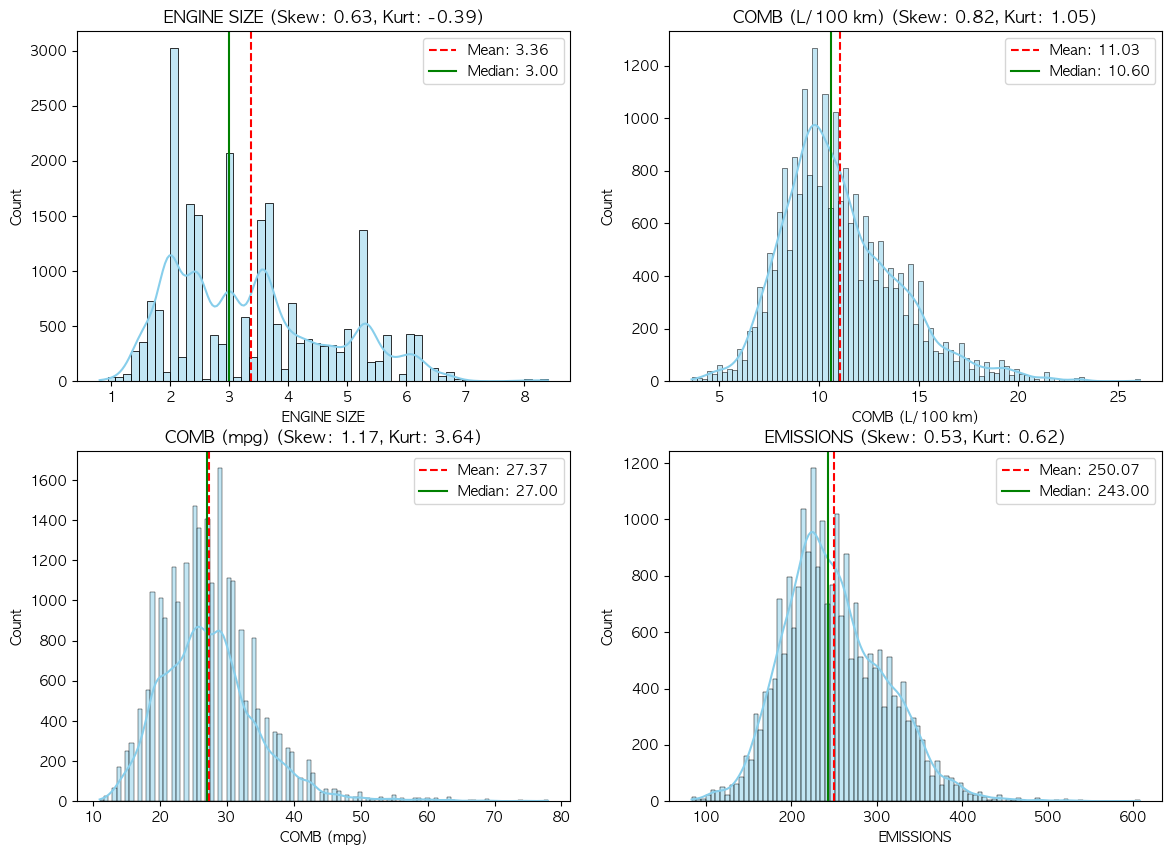

In [97]:
numeric_cols = ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS']

# TODO 1: 왜도/첨도 계산
for col in numeric_cols:
    col_data = df[col]
    print(f"{col} 왜도: {col_data.skew():.2f}")
    print(f"{col} 첨도: {col_data.kurt():.2f}") 

# TODO 2: 결과 DataFrame 정리 (왜도/첨도 해석 컬럼 포함)
data = {
    '변수': ['ENGINE SIZE', 'COMB (L/100 km)', 'COMB (mpg)', 'EMISSIONS'],
    '왜도': [0.63, 0.82, 1.17, 0.53],
    '첨도': [-0.39, 1.05, 3.64, 0.62],
    '왜도 해석': [
        '오른쪽 꼬리 (양의 왜도)', 
        '오른쪽 꼬리 (양의 왜도)', 
        '오른쪽 꼬리 (양의 왜도)', 
        '오른쪽 꼬리 (양의 왜도)'
    ],
    '첨도 해석': [
        '정규분포 유사', 
        '뾰족함 (고첨)', 
        '뾰족함 (고첨)', 
        '정규분포 유사'
    ]
}
summary_df = pd.DataFrame(data)
display(summary_df)

# TODO 3: 2×2 히스토그램+KDE 시각화 (제목에 왜도/첨도 표시, 평균/중앙값 수직선)

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten() # 2x2 배열을 1차원으로 펼쳐서 다루기 쉽게 만듦

for i, col in enumerate(numeric_cols):
    # 히스토그램과 KDE
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    
    # 평균(빨강) 및 중앙값(초록) 수직선 표시
    mean_val = df[col].mean()
    median_val = df[col].median()
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='-', label=f'Median: {median_val:.2f}')
    
    # 제목에 왜도와 첨도 표시 (summary_df 데이터 활용)
    skew_val = summary_df.loc[i, '왜도']
    kurt_val = summary_df.loc[i, '첨도']
    axes[i].set_title(f"{col} (Skew: {skew_val}, Kurt: {kurt_val})", fontweight='bold')
    axes[i].legend()

# TODO 4: 연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교
fuel_dist = df.groupby('FUEL')['EMISSIONS'].agg(['skew', 'kurt']).round(2)
print("연료타입(FUEL)별 EMISSIONS 왜도/첨도 비교")
fuel_dist

# TODO 5: 결과 해석
print("4개 변수 모두 왜도가 0.5보다 큰 양수로 나타나 양의 왜도(오른쪽 꼬리가 긴) 형태를 보인다")
print("그래프 상에서 평균이 중앙값보다 항상 오른쪽에 위치하여 대다수 차량이 낮은 엔진 크기와 낮은 배출량 구간에 밀집해 있지만,")
print("일부 높은 엔지 크기와 배출을 하는 차량이 존재하여 전체 평균을 끌어올리고 있음을 의미한다")
print("COMB (mpg)와 COMB (L/100 km)는 첨도가 각각 3.64와 1.05로 1을 넘는 뾰족한 모양을 띤다")
print("이는 특정 연비 구간에 데이터가 아주 빽빽하게 몰려 있으며 동시에 정규분포보다 이상치가 많을 수 있다는 것을 의미한다")
print("특히 COMB (mpg) 데이터는 특정 수치에 매우 민감하게 밀집된 동시에 이상치의 영향을 강하게 받고 있으므로 분석 시 평균보다 중앙값을 사용하는 것이 더 낫다")
print("ENGINE SIZE와 EMISSIONS는 첨도가 -0.39와 0.62로, 절대값 1 미만으로 상대적으로 완만한 산 모양을 그리며 네 변수 중 정규분포에 가장 가까운 형태를 유지한다")

---

## 🏆 도전 과제: 라이브러리 없이 기술통계 직접 구현

numpy, scipy 없이 **순수 Python**으로 기술통계 함수를 구현합니다.

### 규칙
- `math.sqrt`만 사용 가능
- 내장 함수 `sum()`, `len()`, `sorted()`, `min()`, `max()` 사용 가능

### 구현할 함수

| 함수 | 설명 |
|------|------|
| `my_mean(data)` | 산술평균 |
| `my_trimmed_mean(data, proportion)` | 절사평균 (양쪽 proportion 비율 제거) |
| `my_weighted_mean(data, weights)` | 가중평균 |
| `my_median(data)` | 중앙값 |
| `my_mode(data)` | 최빈값 |
| `my_variance(data, ddof=0)` | 분산 (ddof=0: 모분산, ddof=1: 표본분산) |
| `my_std(data, ddof=0)` | 표준편차 |
| `my_percentile(data, q)` | 퍼센타일 (Nearest Rank 방식) |
| `my_iqr(data)` | 사분위범위 (Q3 - Q1) |

In [ ]:
import math


def my_mean(data):
    """
    산술평균: 합계 / 개수
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        산술평균 값
    
    Examples
    --------
    >>> my_mean([1, 2, 3, 4, 5])
    3.0
    >>> my_mean([10, 20, 30])
    20.0
    """
    pass


def my_trimmed_mean(data, proportion):
    """
    절사평균: 양쪽 끝에서 일정 비율을 제거한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    proportion : float
        제거할 비율 (0 ~ 0.5 미만)
        - 0.1이면 양쪽에서 각각 10%씩 제거 (총 20% 제거)
        - 0.25이면 양쪽에서 각각 25%씩 제거 (총 50% 제거)
    
    Returns
    -------
    float
        절사평균 값
    
    Notes
    -----
    - proportion이 0이면 산술평균과 동일
    - proportion이 0.5에 가까우면 중앙값에 가까워짐
    - 이상치에 민감한 산술평균의 단점을 보완
    
    Examples
    --------
    >>> my_trimmed_mean([1, 2, 3, 4, 100], 0.2)  # 양쪽 1개씩 제거
    3.0  # [2, 3, 4]의 평균
    >>> my_trimmed_mean([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 0.1)  # 양쪽 1개씩 제거
    5.5  # [2, 3, 4, 5, 6, 7, 8, 9]의 평균
    """
    pass


def my_weighted_mean(data, weights):
    """
    가중평균: 각 값에 가중치를 곱한 후 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    weights : list
        가중치 리스트 (data와 길이가 같아야 함)
    
    Returns
    -------
    float
        가중평균 값
    
    Notes
    -----
    - 가중치의 합이 1이 아니어도 됨 (내부에서 정규화)
    - 모든 가중치가 같으면 산술평균과 동일
    
    Examples
    --------
    >>> my_weighted_mean([80, 90, 70], [3, 3, 2])  # 학점 계산
    80.0  # (80*3 + 90*3 + 70*2) / (3+3+2)
    >>> my_weighted_mean([100, 200], [1, 1])  # 동일 가중치
    150.0  # 산술평균과 동일
    """
    pass


def my_median(data):
    """
    중앙값: 정렬 후 가운데 값 (짝수면 두 값의 평균)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        중앙값
    
    Examples
    --------
    >>> my_median([1, 3, 5])  # 홀수 개
    3.0
    >>> my_median([1, 2, 3, 4])  # 짝수 개
    2.5  # (2 + 3) / 2
    """
    pass


def my_mode(data):
    """
    최빈값: 가장 빈번한 값
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    int or float
        가장 빈번하게 등장하는 값 (동률이면 먼저 나온 값)
    
    Examples
    --------
    >>> my_mode([1, 2, 2, 3, 3, 3])
    3
    >>> my_mode([1, 1, 2, 2])  # 동률: 먼저 나온 1 반환
    1
    """
    pass


def my_variance(data, ddof=0):
    """
    분산: 편차 제곱의 평균
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (Delta Degrees of Freedom)
        - ddof=0: 모분산 (N으로 나눔)
        - ddof=1: 표본분산 (N-1로 나눔, 베셀 보정)
    
    Returns
    -------
    float
        분산 값
    
    Examples
    --------
    >>> my_variance([1, 2, 3, 4, 5], ddof=0)  # 모분산
    2.0
    >>> my_variance([1, 2, 3, 4, 5], ddof=1)  # 표본분산
    2.5
    """
    pass


def my_std(data, ddof=0):
    """
    표준편차: 분산의 제곱근
    
    Parameters
    ----------
    data : list
        숫자 리스트
    ddof : int, default=0
        자유도 조정값 (my_variance와 동일)
    
    Returns
    -------
    float
        표준편차 값
    
    Examples
    --------
    >>> my_std([1, 2, 3, 4, 5], ddof=0)  # 모표준편차
    1.4142...
    >>> my_std([1, 2, 3, 4, 5], ddof=1)  # 표본표준편차
    1.5811...
    """
    pass


def my_percentile(data, q):
    """
    q번째 퍼센타일 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    q : float
        퍼센타일 값 (0 ~ 100)
    
    Returns
    -------
    float
        q번째 퍼센타일 값 (실제 데이터 중 하나)
    
    Notes
    -----
    - Nearest Rank 방식: 계산된 위치에서 가장 가까운 인덱스의 실제 값 반환
    - q=0: 최솟값, q=100: 최댓값, q=50: 중앙값 근사
    
    Examples
    --------
    >>> my_percentile([1, 2, 3, 4, 5], 0)
    1  # 최솟값
    >>> my_percentile([1, 2, 3, 4, 5], 50)
    3  # 중앙 위치 값
    >>> my_percentile([1, 2, 3, 4, 5], 100)
    5  # 최댓값
    >>> my_percentile([10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 25)
    30  # 인덱스 round(9 * 0.25) = 2 → 30
    """
    pass


def my_iqr(data):
    """
    사분위범위(IQR): Q3 - Q1 (Nearest Rank 방식)
    
    Parameters
    ----------
    data : list
        숫자 리스트
    
    Returns
    -------
    float
        IQR 값 (75번째 퍼센타일 - 25번째 퍼센타일)
    
    Examples
    --------
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7])  # 인덱스: 0~6
    4.0  # Q3(인덱스 5→6) - Q1(인덱스 2→2) = 6 - 2 = 4
    >>> my_iqr([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
    5.0  # Q3(8) - Q1(3) = 5
    """
    pass

In [18]:
# 검증 코드
import numpy as np
from scipy import stats

print("\n" + "="*60)
print("검증 결과")
print("="*60)

# 테스트 데이터
test_data = [4, 7, 2, 9, 1, 5, 3, 8, 6, 5]
test_odd = [3, 1, 4, 1, 5]
test_single = [42]
test_same = [7, 7, 7, 7, 7]
test_negative = [-5, -2, 0, 3, 7]
test_outlier = [1, 2, 3, 4, 100]

all_pass = True
total = 0
passed = 0

def check(name, mine, expected, tol=0.001):
    global all_pass, total, passed
    total += 1
    if mine is None:
        print(f"  ❌ {name}: 미구현")
        all_pass = False
    else:
        try:
            match = abs(float(mine) - float(expected)) < tol
            if match:
                passed += 1
                print(f"  ✅ {name}: {float(mine):.4f}")
            else:
                all_pass = False
                print(f"  ❌ {name}: {float(mine):.4f} (정답: {float(expected):.4f})")
        except:
            all_pass = False
            print(f"  ❌ {name}: 오류 발생")

# 1. 산술평균
print("\n[my_mean]")
check("기본 데이터", my_mean(test_data), np.mean(test_data))
check("홀수 개", my_mean(test_odd), np.mean(test_odd))
check("단일 값", my_mean(test_single), np.mean(test_single))
check("음수 포함", my_mean(test_negative), np.mean(test_negative))

# 2. 절사평균
print("\n[my_trimmed_mean]")
check("20% 절사", my_trimmed_mean(test_outlier, 0.2), stats.trim_mean(test_outlier, 0.2))
check("10% 절사", my_trimmed_mean(test_data, 0.1), stats.trim_mean(test_data, 0.1))
check("0% 절사", my_trimmed_mean(test_data, 0), stats.trim_mean(test_data, 0))

# 3. 가중평균
print("\n[my_weighted_mean]")
check("학점 계산", my_weighted_mean([80, 90, 70], [3, 3, 2]), np.average([80, 90, 70], weights=[3, 3, 2]))
check("동일 가중치", my_weighted_mean([100, 200], [1, 1]), np.average([100, 200], weights=[1, 1]))
check("가중치 다름", my_weighted_mean([10, 20, 30], [1, 2, 3]), np.average([10, 20, 30], weights=[1, 2, 3]))

# 4. 중앙값
print("\n[my_median]")
check("짝수 개", my_median(test_data), np.median(test_data))
check("홀수 개", my_median(test_odd), np.median(test_odd))
check("단일 값", my_median(test_single), np.median(test_single))
check("음수 포함", my_median(test_negative), np.median(test_negative))

# 5. 최빈값
print("\n[my_mode]")
check("기본 (5가 2번)", my_mode(test_data), stats.mode(test_data, keepdims=False).mode)
check("홀수 (1이 2번)", my_mode(test_odd), stats.mode(test_odd, keepdims=False).mode)
check("동일 값", my_mode(test_same), stats.mode(test_same, keepdims=False).mode)

# 6. 분산
print("\n[my_variance]")
check("모분산 (ddof=0)", my_variance(test_data, 0), np.var(test_data, ddof=0))
check("표본분산 (ddof=1)", my_variance(test_data, 1), np.var(test_data, ddof=1))
check("동일 값 → 0", my_variance(test_same, 0), np.var(test_same, ddof=0))

# 7. 표준편차
print("\n[my_std]")
check("모표준편차", my_std(test_data, 0), np.std(test_data, ddof=0))
check("표본표준편차", my_std(test_data, 1), np.std(test_data, ddof=1))
check("동일 값 → 0", my_std(test_same, 0), np.std(test_same, ddof=0))

# 8. 퍼센타일 (Nearest Rank 방식)
# 주의: numpy는 선형보간 사용, Nearest Rank는 직접 계산
print("\n[my_percentile] - Nearest Rank 방식")
sorted_test = sorted(test_data)  # [1, 2, 3, 4, 5, 5, 6, 7, 8, 9]
check("0% (최솟값)", my_percentile(test_data, 0), min(test_data))
check("50% (중앙값)", my_percentile(test_data, 50), sorted_test[round((len(test_data)-1) * 0.5)])
check("100% (최댓값)", my_percentile(test_data, 100), max(test_data))
# 25%, 75%는 Nearest Rank 방식으로 직접 계산
check("25%", my_percentile(test_data, 25), sorted_test[round((len(test_data)-1) * 0.25)])
check("75%", my_percentile(test_data, 75), sorted_test[round((len(test_data)-1) * 0.75)])

# 9. IQR (Nearest Rank 기준)
print("\n[my_iqr]")
expected_iqr = sorted_test[round((len(test_data)-1) * 0.75)] - sorted_test[round((len(test_data)-1) * 0.25)]
check("기본 데이터", my_iqr(test_data), expected_iqr)
check("동일 값 → 0", my_iqr(test_same), 0)

# 최종 결과
print("\n" + "="*60)
print(f"결과: {passed}/{total} 통과 ({passed/total*100:.0f}%)")
print("="*60)
if all_pass:
    print("🎉 모든 테스트 통과!")
else:
    print("⚠️ 일부 테스트 실패 - 로직을 확인하세요")


검증 결과

[my_mean]


NameError: name 'my_mean' is not defined